## 1 ère étape : Créer un fichier landmarks_coordinates.csv avec les coordonnées des landmarks 
--



Les lignes "landmarks_coordinates.csv" représentent les coordonnées des points faciaux (landmarks) détectés par le modèle Mediapipe FaceMesh.
- landmark_index: Il s'agit de l'indice du point facial (landmark) dans la liste des landmarks détectés. 
- X: C'est la coordonnée X du landmark. 
- Y: C'est la coordonnée Y du landmark.



In [1]:
import cv2
import mediapipe as mp
import numpy as np
import csv
import os

# Ajoutez cette ligne pour spécifier la version de numpy
import numpy as np; np_version = np.__version__.split('.')

if int(np_version[0]) < 1 or (int(np_version[0]) == 1 and int(np_version[1]) < 20):
    raise ImportError("Numpy version 1.20.0 or above is required for this version of mediapipe. "
                      "Please upgrade numpy by running: pip install --upgrade numpy")

# Définition de la fonction eye_aspect_ratio
def eye_aspect_ratio(eye):
    A = np.linalg.norm(eye[1] - eye[5])
    B = np.linalg.norm(eye[2] - eye[4])
    C = np.linalg.norm(eye[0] - eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

# Définition de la fonction mouth_aspect_ratio
def mouth_aspect_ratio(mouth):
    A = np.linalg.norm(mouth[1] - mouth[5])
    B = np.linalg.norm(mouth[2] - mouth[4])
    C = np.linalg.norm(mouth[0] - mouth[3])
    mar = (A + B) / (2.0 * C)
    return mar

# Charger le modèle Mediapipe pour la détection des yeux et des lèvres
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# Initialiser le détecteur de visage et le dessinateur pour les annotations
face_mesh = mp_face_mesh.FaceMesh()
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Charger la vidéo
video_path = 'kss#8-9#F#rldd#28-10.mp4'
video_name = os.path.splitext(os.path.basename(video_path))[0]
cap = cv2.VideoCapture(video_path)

# Initialiser des listes pour stocker les données
ear_list = []
mar_list = []  # Ajout de la liste pour stocker les valeurs de MAR

# Initialiser les listes pour stocker les données
left_eye_landmarks_all_frames = []
right_eye_landmarks_all_frames = []
mouth_landmarks_all_frames = []

# Créer le fichier CSV pour left eye landmarks et écrire l'en-tête
left_eye_csv_file_path = f"{video_name}_left_eye_landmarks.csv"
with open(left_eye_csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Écrire l'en-tête du fichier CSV
    writer.writerow([463, 385, 387, 263, 373, 380])

# Créer le fichier CSV pour right eye landmarks et écrire l'en-tête
right_eye_csv_file_path = f"{video_name}_right_eye_landmarks.csv"
with open(right_eye_csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Écrire l'en-tête du fichier CSV
    writer.writerow([ 133, 158, 160, 33, 144, 153])

# Créer le fichier CSV pour mouth landmarks et écrire l'en-tête
mouth_csv_file_path = f"{video_name}_mouth_landmarks.csv"
with open(mouth_csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Écrire l'en-tête du fichier CSV
    writer.writerow([78,82,312,308,317,87])


# Lecture de la vidéo
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Détecter les visages dans l'image
    faces = face_mesh.process(frame)

    if faces.multi_face_landmarks:
        for face_landmarks in faces.multi_face_landmarks:
            # Extraire les coordonnées des points des yeux
            left_eye_landmarks = []
            keypoint_left_eye = [463, 385, 387, 263, 373, 380]
            for i in keypoint_left_eye:
                left_eye_landmarks.append([face_landmarks.landmark[i].x, face_landmarks.landmark[i].y])
            
            right_eye_landmarks = []
            keypoint_right_eye = [ 133, 158, 160, 33, 144, 153]
            for i in keypoint_right_eye:
                right_eye_landmarks.append([face_landmarks.landmark[i].x, face_landmarks.landmark[i].y])

            # Extraire les coordonnées des points de la bouche
            mouth_landmarks = []
            keypoint_mouth = [78,82,312,308,317,87]
            for i in keypoint_mouth:
                mouth_landmarks.append([face_landmarks.landmark[i].x, face_landmarks.landmark[i].y])

            # Ajouter les coordonnées aux listes respectives
            left_eye_landmarks_all_frames.append(left_eye_landmarks)
            right_eye_landmarks_all_frames.append(right_eye_landmarks)
            mouth_landmarks_all_frames.append(mouth_landmarks)

            # Dessiner les points des yeux sur l'image
            mp_drawing.draw_landmarks(frame, face_landmarks, mp_face_mesh.FACEMESH_CONTOURS, landmark_drawing_spec=drawing_spec)

            
    # Afficher la vidéo
    cv2.imshow('Video', frame)

    # Arrêter la boucle si la touche 'q' est pressée
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# En dehors de la boucle, écrire les coordonnées dans les fichiers CSV correspondants
with open(left_eye_csv_file_path, mode='a', newline='') as file:
    writer = csv.writer(file)
    # Écrire les coordonnées dans le fichier CSV
    writer.writerows(left_eye_landmarks_all_frames)
    print(f"Les coordonnées du left eye landmarks ont été sauvegardées dans : {left_eye_csv_file_path}")

with open(right_eye_csv_file_path, mode='a', newline='') as file:
    writer = csv.writer(file)
    # Écrire les coordonnées dans le fichier CSV
    writer.writerows(right_eye_landmarks_all_frames)
    print(f"Les coordonnées du right eye landmarks ont été sauvegardées dans : {right_eye_csv_file_path}")

with open(mouth_csv_file_path, mode='a', newline='') as file:
    writer = csv.writer(file)
    # Écrire les coordonnées dans le fichier CSV
    writer.writerows(mouth_landmarks_all_frames)
    print(f"Les coordonnées du mouth landmarks ont été sauvegardées dans : {mouth_csv_file_path}")

# Libérer la capture vidéo
cap.release()
cv2.destroyAllWindows()


I0000 00:00:1700559403.541652       1 gl_context.cc:344] GL version: 2.1 (2.1 INTEL-18.8.5), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine (1x6x8 (fused) LP
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Les coordonnées du left eye landmarks ont été sauvegardées dans : output_video_opencv_left_eye_landmarks.csv
Les coordonnées du right eye landmarks ont été sauvegardées dans : output_video_opencv_right_eye_landmarks.csv
Les coordonnées du mouth landmarks ont été sauvegardées dans : output_video_opencv_mouth_landmarks.csv


: 

## 2 ème étape : Statistiques sur nos données 

In [58]:
import pandas as pd
import numpy as np

# Chemins des fichiers CSV
left_eye_csv_path = "output_video_opencv_left_eye_landmarks.csv"
right_eye_csv_path = "output_video_opencv_mouth_landmarks.csv"
mouth_csv_path = "output_video_opencv_right_eye_landmarks.csv"

# Liste des chemins des fichiers
csv_paths = [left_eye_csv_path, right_eye_csv_path, mouth_csv_path]

# Dictionnaire pour stocker les résultats
results = {}

# Parcourir chaque fichier CSV
for csv_path in csv_paths:
    # Lire le fichier CSV
    df = pd.read_csv(csv_path, header=None)

    # Récupérer le nom du fichier à partir du chemin
    file_name = csv_path.split("/")[-1]

    # Initialiser le dictionnaire pour le fichier actuel
    results[file_name] = {}

    # Récupérer les noms de colonnes à partir de la première ligne
    column_names = df.iloc[0]

    # Parcourir chaque colonne du dataframe
    for col, col_name in zip(df.columns, column_names):
        # Ignorer la première ligne (en-tête)
        values = df[col][1:].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else x)

        # Vérifier si chaque valeur est une liste avant d'accéder à ses éléments
        x_values = values.apply(lambda x: x[0] if isinstance(x, (list, np.ndarray)) else x)
        y_values = values.apply(lambda x: x[1] if isinstance(x, (list, np.ndarray)) else x)

        # Stocker les résultats pour la colonne actuelle avec le nom de l'en-tête
        results[file_name][col_name] = {
            "min_x": x_values.min(),
            "max_x": x_values.max(),
            "mean_x": x_values.mean(),
            "min_y": y_values.min(),
            "max_y": y_values.max(),
            "mean_y": y_values.mean(),
        }

# Afficher les résultats
for file_name, values in results.items():
    print(f"Résultats pour le fichier {file_name}:")
    for col_name, stats in values.items():
        print(f"{col_name}:")
        print(f"  Min X: {stats['min_x']}")
        print(f"  Max X: {stats['max_x']}")
        print(f"  Moyenne X: {stats['mean_x']}")
        print(f"  Min Y: {stats['min_y']}")
        print(f"  Max Y: {stats['max_y']}")
        print(f"  Moyenne Y: {stats['mean_y']}")
        print()


Résultats pour le fichier output_video_opencv_left_eye_landmarks.csv:
463:
  Min X: 0.4926779270172119
  Max X: 0.5047415494918823
  Moyenne X: 0.49867510386875696
  Min Y: 0.5000625848770142
  Max Y: 0.5083936452865601
  Moyenne Y: 0.5032115127018519

385:
  Min X: 0.5320295691490173
  Max X: 0.5462208986282349
  Moyenne X: 0.5381447552272252
  Min Y: 0.49003610014915466
  Max Y: 0.5044072270393372
  Moyenne Y: 0.4943146596976689

387:
  Min X: 0.5646759867668152
  Max X: 0.5818819999694824
  Moyenne X: 0.5722761506353106
  Min Y: 0.4905235171318054
  Max Y: 0.5052376389503479
  Moyenne Y: 0.49515981544767107

263:
  Min X: 0.5894086360931396
  Max X: 0.6066521406173706
  Moyenne X: 0.5966231142452785
  Min Y: 0.4990767240524292
  Max Y: 0.5104472637176514
  Moyenne Y: 0.5032212797233037

373:
  Min X: 0.5640896558761597
  Max X: 0.5796957015991211
  Moyenne X: 0.5708947482790265
  Min Y: 0.5055655241012573
  Max Y: 0.5146216154098511
  Moyenne Y: 0.5088842425346375

380:
  Min X: 0.5

## 3 ème étape : Créer un data frame avec les valeurs de  EAR et MAR 
--


In [5]:
import pandas as pd
import numpy as np

# Charger les fichiers CSV dans des DataFrames
left_eye_df = pd.read_csv("output_video_opencv_left_eye_landmarks.csv")
right_eye_df = pd.read_csv("output_video_opencv_right_eye_landmarks.csv")
mouth_df = pd.read_csv("output_video_opencv_mouth_landmarks.csv")

# Définir la fonction pour extraire les coordonnées x et y à partir d'une chaîne formatée
def extract_coordinates(coord_str):
    # Supprimer les crochets et diviser la chaîne en valeurs x et y
    x, y = map(float, coord_str.strip('[]').split(', '))
    return x, y

# Appliquer la fonction d'extraction aux colonnes des DataFrames
left_eye_df = left_eye_df.apply(lambda col: col.map(extract_coordinates))
right_eye_df = right_eye_df.apply(lambda col: col.map(extract_coordinates))
mouth_df = mouth_df.apply(lambda col: col.map(extract_coordinates))

# Vérifier et ajouter la colonne 'Frame' si nécessaire
if 'Frame' not in left_eye_df.columns:
    left_eye_df['Frame'] = np.arange(len(left_eye_df))
if 'Frame' not in right_eye_df.columns:
    right_eye_df['Frame'] = np.arange(len(right_eye_df))
if 'Frame' not in mouth_df.columns:
    mouth_df['Frame'] = np.arange(len(mouth_df))

# Définir les fonctions pour calculer l'EAR et le MAR
def eye_aspect_ratio(eye):
    A = np.linalg.norm(np.array(eye[1]) - np.array(eye[5]))
    B = np.linalg.norm(np.array(eye[2]) - np.array(eye[4]))
    C = np.linalg.norm(np.array(eye[0]) - np.array(eye[3]))
    ear = (A + B) / (2.0 * C)
    return ear

def mouth_aspect_ratio(mouth):
    
    A = np.linalg.norm(np.array(mouth[1]) - np.array(mouth[5]))
    B = np.linalg.norm(np.array(mouth[2]) - np.array(mouth[4]))
    C = np.linalg.norm(np.array(mouth[0]) - np.array(mouth[3]))
    mar = (A + B) / (2.0 * C)
    return mar

# Calculer l'EAR et le MAR pour chaque frame
ear_values_left = left_eye_df.apply(eye_aspect_ratio, axis=1)
ear_values_right = right_eye_df.apply(eye_aspect_ratio, axis=1)
ear_values_combined = (ear_values_left + ear_values_right) / 2.0

mar_values = mouth_df.apply(mouth_aspect_ratio, axis=1)

# Créer un DataFrame avec les résultats
result_df = pd.DataFrame({
    'Frame': left_eye_df['Frame'],
    'EAR': ear_values_combined,
    'MAR': mar_values
})

# Afficher le DataFrame résultant
print(result_df)

# Sauvegarder le DataFrame résultant dans un fichier CSV si nécessaire
result_df.to_csv("output_combined_ear_mar.csv", index=False)


/var/folders/wh/czvmpqsn0kzfln6_brp6j8ph0000gn/T/ipykernel_25433/4054037229.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  A = np.linalg.norm(np.array(eye[1]) - np.array(eye[5]))
/var/folders/wh/czvmpqsn0kzfln6_brp6j8ph0000gn/T/ipykernel_25433/4054037229.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  B = np.linalg.norm(np.array(eye[2]) - np.array(eye[4]))
/var/folders/wh/czvmpqsn0kzfln6_brp6j8ph0000gn/T/ipykernel_25433/4054037229.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

     Frame       EAR       MAR
0        0  0.125049  0.039263
1        1  0.155520  0.024508
2        2  0.143157  0.023178
3        3  0.141510  0.031668
4        4  0.139343  0.037827
..     ...       ...       ...
870    870  0.137937  0.026052
871    871  0.142777  0.026245
872    872  0.141619  0.028076
873    873  0.141304  0.027686
874    874  0.142091  0.028140

[875 rows x 3 columns]


## 4 ème étape : Visualiser l'évolution de EAR et MAX dans le temps 
--


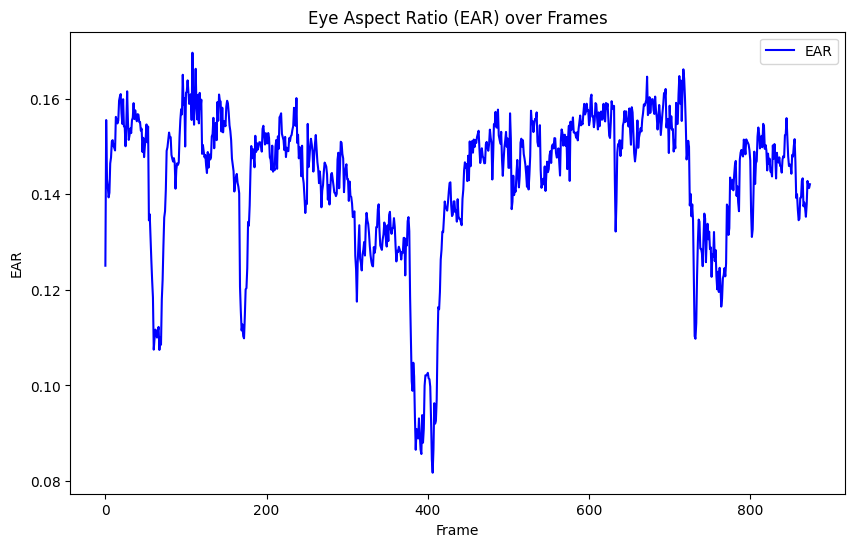

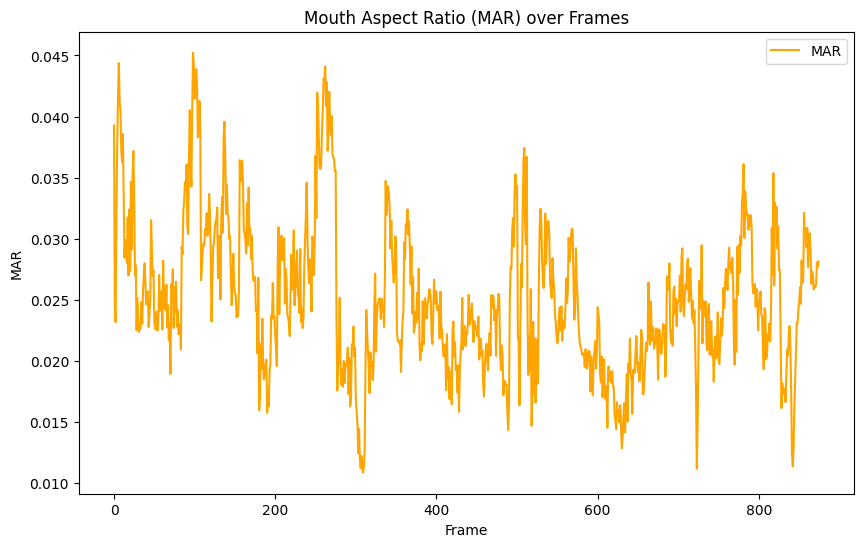

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
result_df = pd.read_csv("output_combined_ear_mar.csv")

# Tracer l'EAR en fonction des frames
plt.figure(figsize=(10, 6))
plt.plot(result_df['Frame'], result_df['EAR'], label='EAR', color='blue')
plt.xlabel('Frame')
plt.ylabel('EAR')
plt.title('Eye Aspect Ratio (EAR) over Frames')
plt.legend()
plt.show()

# Tracer le MAR en fonction des frames
plt.figure(figsize=(10, 6))
plt.plot(result_df['Frame'], result_df['MAR'], label='MAR', color='orange')
plt.xlabel('Frame')
plt.ylabel('MAR')
plt.title('Mouth Aspect Ratio (MAR) over Frames')
plt.legend()
plt.show()


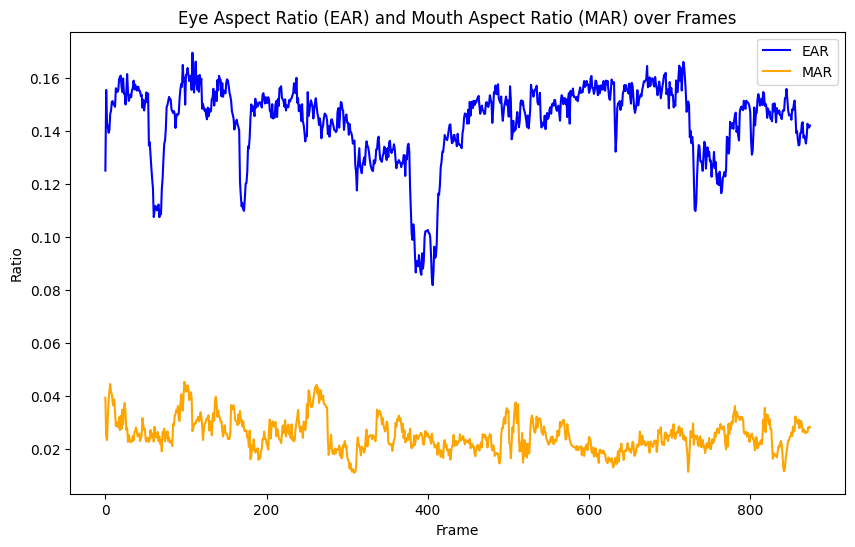

0      0.125049
1      0.155520
2      0.143157
3      0.141510
4      0.139343
         ...   
870    0.137937
871    0.142777
872    0.141619
873    0.141304
874    0.142091
Name: EAR, Length: 875, dtype: float64
0      0.039263
1      0.024508
2      0.023178
3      0.031668
4      0.037827
         ...   
870    0.026052
871    0.026245
872    0.028076
873    0.027686
874    0.028140
Name: MAR, Length: 875, dtype: float64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
result_df = pd.read_csv("output_combined_ear_mar.csv")

# Tracer l'EAR et le MAR sur un seul plot
plt.figure(figsize=(10, 6))

plt.plot(result_df['Frame'], result_df['EAR'], label='EAR', color='blue')
plt.plot(result_df['Frame'], result_df['MAR'], label='MAR', color='orange')

plt.xlabel('Frame')
plt.ylabel('Ratio')
plt.title('Eye Aspect Ratio (EAR) and Mouth Aspect Ratio (MAR) over Frames')
plt.legend()
plt.show()

#print les valeurs de EAR
print(result_df['EAR'])
#print les valeurs de MAR
print(result_df['MAR'])
